# Summary


In [1]:
#Install Packages
!pip install app-store-scraper
!pip install wordcloud

#Import Libraries
from app_store_scraper import AppStore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import json,os,uuid
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbkhn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [2]:
#Collect all the ChatGPT reviews from App Store
a_reviews = AppStore('us','twitter','333903271')
a_reviews.review(sleep=1)

2023-10-30 00:21:51,397 [INFO] Base - Initialised: AppStore('us', 'twitter', 333903271)
2023-10-30 00:21:51,397 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/twitter/id333903271
2023-10-30 00:21:57,429 [INFO] Base - [id:333903271] Fetched 60 reviews (60 fetched in total)
2023-10-30 00:22:04,665 [INFO] Base - [id:333903271] Fetched 120 reviews (120 fetched in total)
2023-10-30 00:22:15,018 [INFO] Base - [id:333903271] Fetched 200 reviews (200 fetched in total)
2023-10-30 00:22:23,866 [INFO] Base - [id:333903271] Fetched 260 reviews (260 fetched in total)
2023-10-30 00:22:32,487 [INFO] Base - [id:333903271] Fetched 340 reviews (340 fetched in total)
2023-10-30 00:22:41,249 [INFO] Base - [id:333903271] Fetched 400 reviews (400 fetched in total)
2023-10-30 00:22:50,083 [INFO] Base - [id:333903271] Fetched 460 reviews (460 fetched in total)
2023-10-30 00:22:58,125 [INFO] Base - [id:333903271] Fetched 540 reviews (540 fetched in total)
2023-10-30 00:23:06,198 [INFO

2023-10-30 00:34:01,886 [INFO] Base - [id:333903271] Fetched 6140 reviews (6140 fetched in total)
2023-10-30 00:34:09,815 [INFO] Base - [id:333903271] Fetched 6220 reviews (6220 fetched in total)
2023-10-30 00:34:17,322 [INFO] Base - [id:333903271] Fetched 6300 reviews (6300 fetched in total)
2023-10-30 00:34:25,934 [INFO] Base - [id:333903271] Fetched 6380 reviews (6380 fetched in total)
2023-10-30 00:34:35,081 [INFO] Base - [id:333903271] Fetched 6460 reviews (6460 fetched in total)
2023-10-30 00:34:42,001 [INFO] Base - [id:333903271] Fetched 6540 reviews (6540 fetched in total)
2023-10-30 00:34:50,623 [INFO] Base - [id:333903271] Fetched 6620 reviews (6620 fetched in total)
2023-10-30 00:34:57,350 [INFO] Base - [id:333903271] Fetched 6700 reviews (6700 fetched in total)
2023-10-30 00:35:05,350 [INFO] Base - [id:333903271] Fetched 6780 reviews (6780 fetched in total)
2023-10-30 00:35:12,516 [INFO] Base - [id:333903271] Fetched 6860 reviews (6860 fetched in total)
2023-10-30 00:35:19,

2023-10-30 00:44:43,353 [INFO] Base - [id:333903271] Fetched 12780 reviews (12780 fetched in total)
2023-10-30 00:44:51,294 [INFO] Base - [id:333903271] Fetched 12860 reviews (12860 fetched in total)
2023-10-30 00:44:58,268 [INFO] Base - [id:333903271] Fetched 12940 reviews (12940 fetched in total)
2023-10-30 00:45:05,789 [INFO] Base - [id:333903271] Fetched 13020 reviews (13020 fetched in total)
2023-10-30 00:45:13,140 [INFO] Base - [id:333903271] Fetched 13100 reviews (13100 fetched in total)
2023-10-30 00:45:21,300 [INFO] Base - [id:333903271] Fetched 13180 reviews (13180 fetched in total)
2023-10-30 00:45:29,633 [INFO] Base - [id:333903271] Fetched 13260 reviews (13260 fetched in total)
2023-10-30 00:45:38,297 [INFO] Base - [id:333903271] Fetched 13360 reviews (13360 fetched in total)
2023-10-30 00:45:46,762 [INFO] Base - [id:333903271] Fetched 13460 reviews (13460 fetched in total)
2023-10-30 00:45:54,243 [INFO] Base - [id:333903271] Fetched 13540 reviews (13540 fetched in total)


2023-10-30 00:55:04,681 [INFO] Base - [id:333903271] Fetched 19360 reviews (19360 fetched in total)
2023-10-30 00:55:13,589 [INFO] Base - [id:333903271] Fetched 19440 reviews (19440 fetched in total)
2023-10-30 00:55:21,279 [INFO] Base - [id:333903271] Fetched 19500 reviews (19500 fetched in total)
2023-10-30 00:55:28,398 [INFO] Base - [id:333903271] Fetched 19580 reviews (19580 fetched in total)
2023-10-30 00:55:36,117 [INFO] Base - [id:333903271] Fetched 19660 reviews (19660 fetched in total)
2023-10-30 00:55:45,237 [INFO] Base - [id:333903271] Fetched 19740 reviews (19740 fetched in total)
2023-10-30 00:55:53,229 [INFO] Base - [id:333903271] Fetched 19820 reviews (19820 fetched in total)
2023-10-30 00:56:01,133 [INFO] Base - [id:333903271] Fetched 19900 reviews (19900 fetched in total)
2023-10-30 00:56:09,007 [INFO] Base - [id:333903271] Fetched 19980 reviews (19980 fetched in total)
2023-10-30 00:56:16,903 [INFO] Base - [id:333903271] Fetched 20060 reviews (20060 fetched in total)


2023-10-30 01:06:13,263 [INFO] Base - [id:333903271] Fetched 25740 reviews (25740 fetched in total)
2023-10-30 01:06:21,163 [INFO] Base - [id:333903271] Fetched 25820 reviews (25820 fetched in total)
2023-10-30 01:06:29,489 [INFO] Base - [id:333903271] Fetched 25900 reviews (25900 fetched in total)
2023-10-30 01:06:39,398 [INFO] Base - [id:333903271] Fetched 25980 reviews (25980 fetched in total)
2023-10-30 01:06:47,828 [INFO] Base - [id:333903271] Fetched 26060 reviews (26060 fetched in total)
2023-10-30 01:06:55,965 [INFO] Base - [id:333903271] Fetched 26140 reviews (26140 fetched in total)
2023-10-30 01:07:03,806 [INFO] Base - [id:333903271] Fetched 26220 reviews (26220 fetched in total)
2023-10-30 01:07:11,899 [INFO] Base - [id:333903271] Fetched 26300 reviews (26300 fetched in total)
2023-10-30 01:07:20,380 [INFO] Base - [id:333903271] Fetched 26380 reviews (26380 fetched in total)
2023-10-30 01:07:27,677 [INFO] Base - [id:333903271] Fetched 26460 reviews (26460 fetched in total)


In [12]:
data = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2023-10-16 00:30:03,In a world where all other social media sites ...,5,False,RepHolt,My take on X,NaN
1,2023-08-24 20:53:19,A lot of acknowledgments are sparse through a ...,5,False,Narcii Jester,Interested,NaN
2,2023-08-16 18:33:25,Twitter was perfectly fine before it was bough...,3,False,Da geek of dis game,Just an insecure billionaire needing to put us...,NaN
3,2023-08-22 14:28:02,"I never liked Twitter before Elon but gosh, he...",2,False,~pickle~,Twitter’s inevitable decline,NaN
4,2023-09-24 19:54:10,"X, formerly known as Twitter is the great mode...",5,False,Crazydavey59,The Evolution of X,NaN


In [13]:
data.shape

(27140, 7)

In [14]:
data.drop(['isEdited','userName','developerResponse'],axis=1,inplace=True) #Delete columns
data = data[['date','title','review','rating']] #Rearrange columns
data.head()

,date,title,review,rating
0,2023-10-16 00:30:03,My take on X,In a world where all other social media sites ...,5
1,2023-08-24 20:53:19,Interested,A lot of acknowledgments are sparse through a ...,5
2,2023-08-16 18:33:25,Just an insecure billionaire needing to put us...,Twitter was perfectly fine before it was bough...,3
3,2023-08-22 14:28:02,Twitter’s inevitable decline,"I never liked Twitter before Elon but gosh, he...",2
4,2023-09-24 19:54:10,The Evolution of X,"X, formerly known as Twitter is the great mode...",5


In [15]:
data.to_excel('X_reviews.xlsx', index=False)

In [16]:
data.to_csv('X_reviews.csv', index=False)

In [17]:
data.head()

,date,title,review,rating
0,2023-10-16 00:30:03,My take on X,In a world where all other social media sites ...,5
1,2023-08-24 20:53:19,Interested,A lot of acknowledgments are sparse through a ...,5
2,2023-08-16 18:33:25,Just an insecure billionaire needing to put us...,Twitter was perfectly fine before it was bough...,3
3,2023-08-22 14:28:02,Twitter’s inevitable decline,"I never liked Twitter before Elon but gosh, he...",2
4,2023-09-24 19:54:10,The Evolution of X,"X, formerly known as Twitter is the great mode...",5


# EDA

In [18]:
data = pd.read_csv('X_reviews.csv')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27140 entries, 0 to 27139
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    27140 non-null  object
 1   title   27140 non-null  object
 2   review  27140 non-null  object
 3   rating  27140 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 848.2+ KB


In [20]:
data.shape

(27140, 4)

In [21]:
data.describe()

,rating
count,27140.000000
mean,3.650884
std,1.683834
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [22]:
data.describe(include='object')

,date,title,review
count,27140,27140,27140
unique,27133,21629,27135
top,2020-11-29 20:18:11,Twitter,Much better since Elon took over.
freq,2,363,2


Analysis of Rating Column

In [23]:
#Rating Distribution
data['rating'].value_counts().sort_index()

1     6333
2     1603
3     2058
4     2358
5    14788
Name: rating, dtype: int64

In [24]:
data['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

1    23.33
2     5.91
3     7.58
4     8.69
5    54.49
Name: rating, dtype: float64

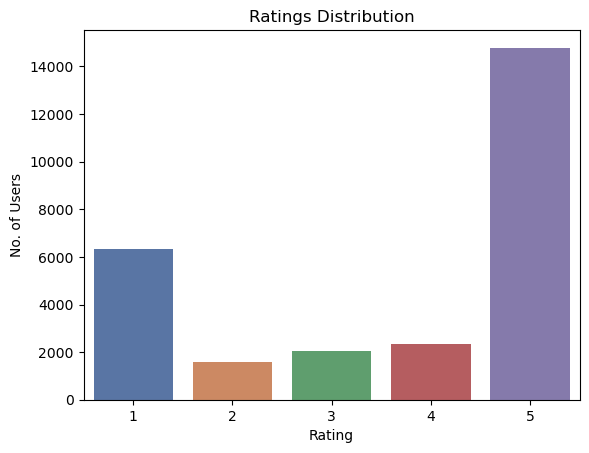

In [25]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.countplot(data=data, x='rating')

plt.xlabel('Rating')
plt.ylabel('No. of Users')
plt.title('Ratings Distribution')

plt.show()

# Data Preprocessing

In [26]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

date      0
title     0
review    0
rating    0
dtype: int64

In [27]:
#Combine Review Time and Review
data['complete_review'] = data['title'] +' .'+data['review']

In [28]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title']
data = data.drop(remove_cols,axis='columns')

In [29]:
data.head()

,rating,complete_review
0,5,My take on X .In a world where all other socia...
1,5,Interested .A lot of acknowledgments are spars...
2,3,Just an insecure billionaire needing to put us...
3,2,Twitter’s inevitable decline .I never liked Tw...
4,5,"The Evolution of X .X, formerly known as Twitt..."


1. Convert all the reviews to lowercase

In [30]:
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['complete_review'].head()

0    my take on x .in a world where all other socia...
1    interested .a lot of acknowledgments are spars...
2    just an insecure billionaire needing to put us...
3    twitter’s inevitable decline .i never liked tw...
4    the evolution of x .x, formerly known as twitt...
Name: complete_review, dtype: object

2. Remove Punctuation

In [31]:
data['complete_review'] = data['complete_review'].str.replace('[^\w\s]','')

3. Remove Emojis

In [32]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['complete_review'] = data['complete_review'].apply(lambda x: remove_emoji(x))

4. Remove Stopwords

Stopwords are commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence and can be ignored without having a drastic effect on the meaning of the sentence.

In [33]:
stop = stopwords.words('english')
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

5. Apply Lemmatization

In [34]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
data['complete_review']= data['complete_review'].apply(space)

NameError: name 'nlp' is not defined

6. Remove certain words

  These are specific to app and won't show any sentiments

In [42]:
words_to_remove = ['twitter','app','platform','chat','still','nothing','one']
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

7. Map ratings to positive, negative & neutral sentiment

0 will represent negative sentiment

1 will represent neutral sentiment

2 will represent positive sentiment


In [43]:
data['sentiment'] = data['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
data.head(5)

,rating,complete_review,sentiment
0,5,take x world social media sites become artific...,2
1,5,interested lot acknowledgments sparse atmosphe...,2
2,3,insecure billionaire needing put us hark somet...,1
3,2,twitters inevitable decline never liked elon g...,0
4,5,evolution x x formerly known great modern medi...,2


In [44]:
data['sentiment'].value_counts(normalize=True).mul(100).round(2)

2    63.18
0    29.24
1     7.58
Name: sentiment, dtype: float64

Data is Imbalanced as about 66% of sentiment is positive, 24% is negative and 9.5% is neutral.

# Reviews Analysis

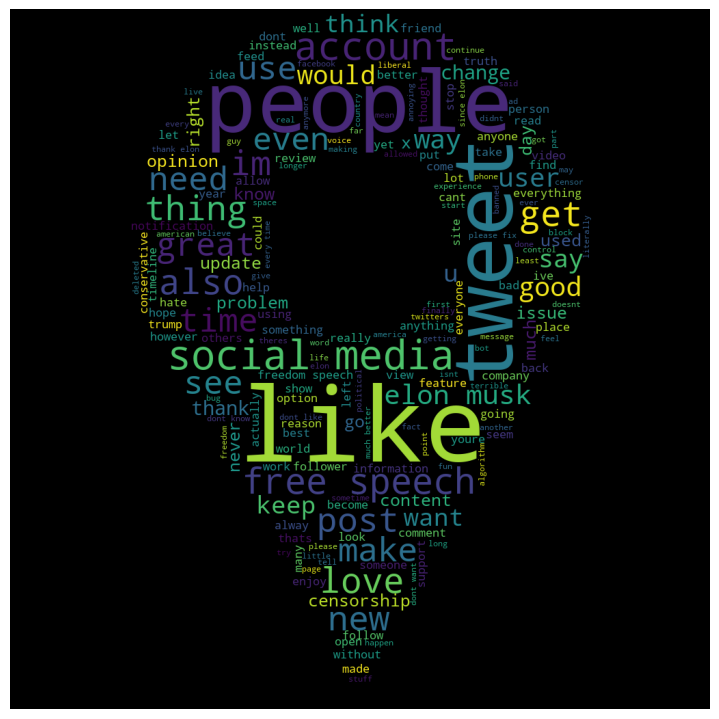

In [45]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in data.complete_review)
mask = np.array(Image.open("loc.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('review_sentiment.png')
plt.show()

In [46]:
#positive negative & neutral sentiment:
positive = data[data['sentiment'] == 2]
negative = data[data['sentiment'] == 0]
neutral = data[data['sentiment'] == 1]

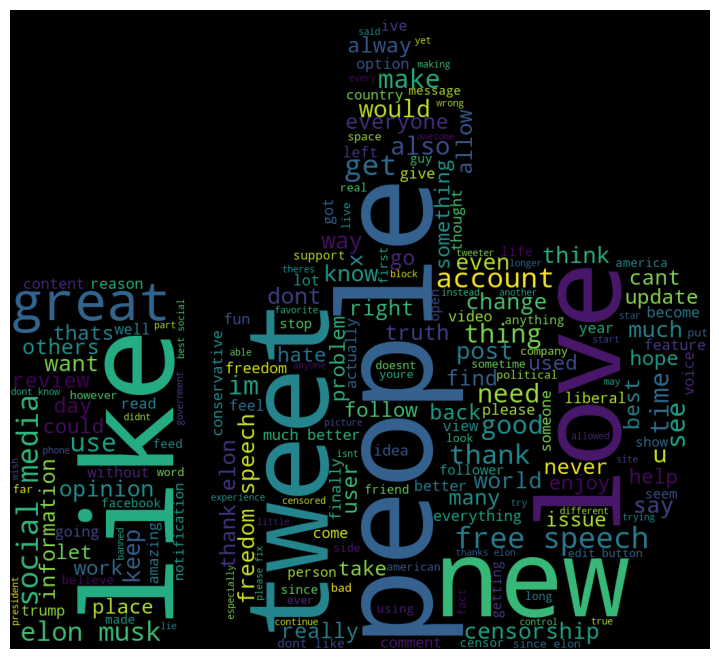

In [47]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
mask = np.array(Image.open("thumbs_up.png"))
wordcloud = WordCloud(width = 2200, height = 2300,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_sentiment.png')
plt.show()
wordcloud.to_file("posid.png")

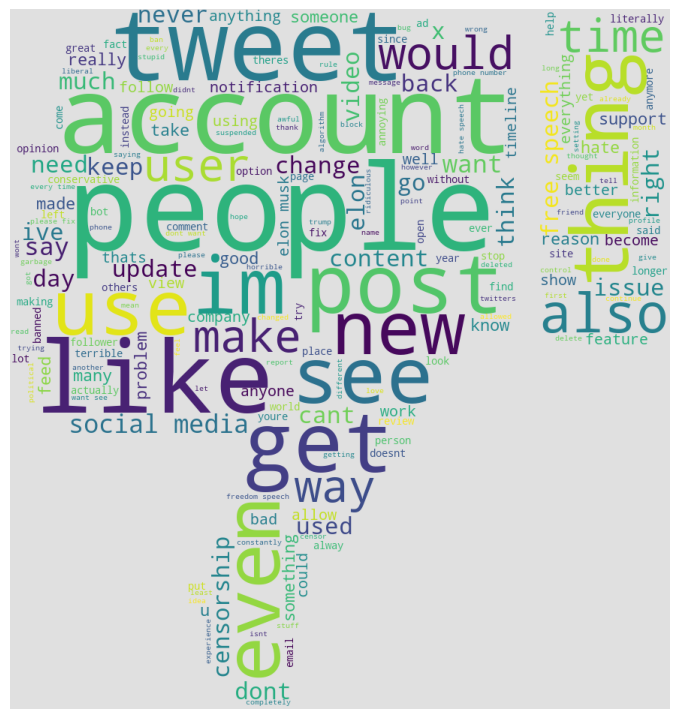

In [48]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
mask = np.array(Image.open("./thumbs_down.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='#E0E0E0',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_sentiment.png')
plt.show()

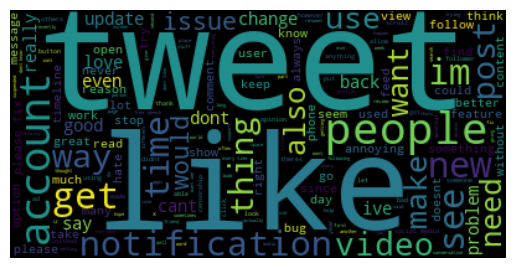

In [50]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis Model


<h3> Bag of Word Vectorization </h3>

In [51]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(data['complete_review'])
y = data['sentiment']

Handle Imbalanced Data

In [52]:
# Instantiate the SMOTE object
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

Train, Test Split

In [53]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,y_oversampled,test_size=0.15,random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43722, 29375)
(7716, 29375)
(43722,)
(7716,)


<h3> Multinomial Naive Bayes </h3>

In [54]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
y_pred = MNB.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      2744
           1       0.59      0.63      0.61      2416
           2       0.71      0.71      0.71      2556

    accuracy                           0.65      7716
   macro avg       0.65      0.65      0.65      7716
weighted avg       0.65      0.65      0.65      7716



Logistic Regression

In [55]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62      2229
           1       0.84      0.68      0.75      3200
           2       0.69      0.77      0.73      2287

    accuracy                           0.70      7716
   macro avg       0.70      0.71      0.70      7716
weighted avg       0.72      0.70      0.71      7716



<h3> Random Forest </h3>

In [56]:
# Initialize and train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2843
           1       0.88      0.83      0.85      2729
           2       0.67      0.80      0.73      2144

    accuracy                           0.78      7716
   macro avg       0.78      0.78      0.78      7716
weighted avg       0.79      0.78      0.78      7716



XGBoost

In [57]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]

print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2459
           1       0.88      0.96      0.92      2365
           2       0.91      0.81      0.86      2892

    accuracy                           0.88      7716
   macro avg       0.88      0.88      0.88      7716
weighted avg       0.88      0.88      0.88      7716



#Conclusion

The best-performing model was identified as XGBoost, which achieved an accuracy of 88% with the f1-score of 0.78 and above for all the labels(positive,negative & neutral). This model demonstrates the ability to accurately predict sentiment based on Twitter reviews.

Overall, with the developed sentiment analysis model, we can effectively analyze and understand the sentiment expressed in Twitter reviews. This provides valuable insights for businesses, helping them make informed decisions, improve customer satisfaction, and enhance their products and services based on customer feedback.